In [1]:
from __future__ import division, print_function
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import colors as mcolors
import matplotlib.pyplot as plt

def cc(arg):
    return mcolors.to_rgba(arg, alpha=0.6)

from shapely.geometry import Polygon, Point

def get_points_in_polygon(poly, n=1000):
    (minx, miny, maxx, maxy) = poly.bounds
    x = np.linspace(minx, maxx, n, endpoint=True)
    y = np.linspace(miny, maxy, n, endpoint=True)
    x, y = np.meshgrid(x,y)
    points = []
    for i, j in zip(x.flatten(), y.flatten()):
        p = Point(i,j)
        if poly.intersects(p):
            points.append([i,j])
    return points

def rotate(points, angle):
    alpha = angle *np.pi/180
    return np.dot(np.array([[np.cos(alpha), -np.sin(alpha)],[np.sin(alpha), np.cos(alpha)]]), points.T).T

In [2]:
%matplotlib widget

# Masivní betonový sloupek T

In [3]:
prurez = np.array([[150, -525],
                  [150, -75],
                  [300, -75],
                  [300, 375],
                  [-300, 375],
                  [-300, -75],
                  [-150, -75],
                  [-150, -525],
                  [150, -525]])
p = Polygon(prurez[:, :2])

points = get_points_in_polygon(p)
points = np.array(points)

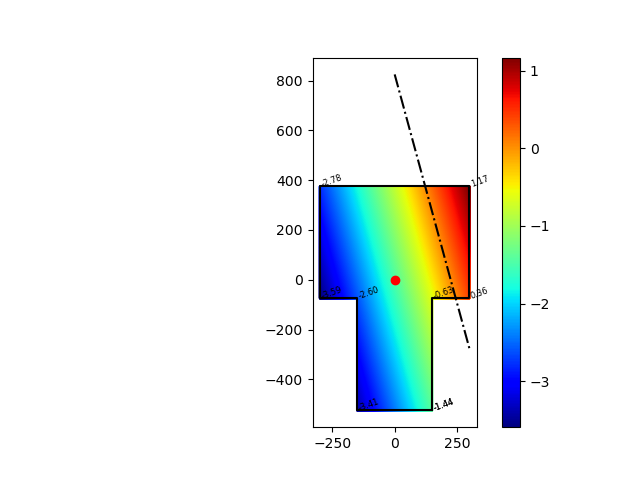

In [4]:
N = -600e-3
My = -45e-3
Mz = 60e-3
Iy = 25.0594e-3
Iz = 9.1125e-3
A = 0.405

pnts = points#rotate(points, 90+45)
#pnts[:,1] *= -1
sigx = N/A - My/Iy*pnts[:,1]*1e-3 + Mz/Iz*pnts[:,0]*1e-3
plt.figure()
plt.plot(prurez[:, 0], prurez[:, 1], 'k-')
plt.plot(0,0, 'ro')
#plt.plot(points[:, 0], points[:,1], 'kx')
plt.scatter(points[:, 0], points[:, 1], c=sigx, cmap=plt.cm.jet, vmin=sigx.min(), vmax=sigx.max(), s=.5)

plt.colorbar()
plt.gca().set_aspect('equal')

fsigx = lambda y, z: N/A - My/Iy*z*1e-3 + Mz/Iz*y*1e-3

plt.plot([0, 225, 300], [825, 0, -275.11],'k-.')


for row in prurez:
    y, z = row
    plt.text(y, z, '{:.2f}'.format(fsigx(y, z)), rotation=20, fontsize=6)

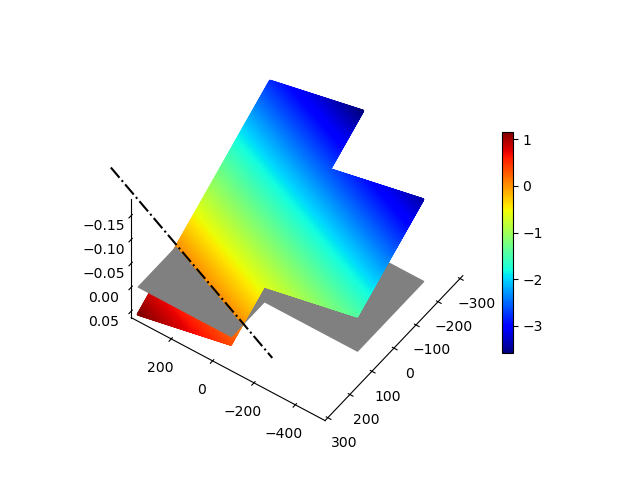

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = points[:, 0]
y = points[:, 1]
z = sigx/20

xp = prurez[:, 0]
yp = prurez[:, 1]
verts = list(zip(xp,yp,np.zeros_like(xp)))
ax.add_collection3d(Poly3DCollection([verts], color='grey', zorder=0), zdir='x')

mask = sigx < 0
cm = ax.scatter(x[~mask], y[~mask], z[~mask], c=sigx[~mask], cmap=plt.cm.jet, vmin=sigx.min(), vmax=sigx.max(), s=.5, zorder=10)
cm = ax.scatter(x[mask], y[mask], z[mask], c=sigx[mask], cmap=plt.cm.jet, vmin=sigx.min(), vmax=sigx.max(), s=.5, zorder=-10)
plt.colorbar(cm, shrink=.6)
#ax.add_collection3d(Poly3DCollection([verts]), zs=sigx, zdir='x')



ax.scatter(0,0,0, c='r')
plt.plot([0, 225, 300], [825, 0, -275.11],[0,0,0],'k-.', zorder=11)

ax.set_xlim(x.min(),x.max())
ax.set_ylim(y.min(),y.max())
ax.set_zlim(z.min(),z.max())

ax.view_init(elev=-131.625, azim=144.609375)
ax.set_proj_type('ortho')
# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)